<a href="https://colab.research.google.com/github/YugSarda/DL_projects/blob/main/facial_expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving facial_expression.zip to facial_expression.zip


In [4]:
import zipfile
import os
import shutil

zip_path = "/content/facial_expression.zip"   # ✅ Uploaded file path
extract_dir = "/content/facial_expression_dataset"  # ✅ Output folder name

# Remove old extracted folder (if exists)
if os.path.exists(extract_dir):
    shutil.rmtree(extract_dir)

# Extract ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Dataset extracted successfully!")
print("📂 Extracted to:", extract_dir)
print("📁 Contents inside:", os.listdir(extract_dir))


✅ Dataset extracted successfully!
📂 Extracted to: /content/facial_expression_dataset
📁 Contents inside: ['test', 'train']


In [5]:
import os

base_dir1 = "/content/facial_expression_dataset/train"
base_dir2 = "/content/facial_expression_dataset/test"
train_dir = os.path.join(base_dir1, "train")
test_dir = os.path.join(base_dir2, "test")

print("📂 Train directory:", train_dir)
print("📂 Test directory:", test_dir)
print("\nClasses (emotions) inside train folder:\n", os.listdir(train_dir))


📂 Train directory: /content/facial_expression_dataset/train/train
📂 Test directory: /content/facial_expression_dataset/test/test

Classes (emotions) inside train folder:
 ['neutral', 'angry', 'disgust', 'sad', 'surprise', 'fear', 'happy']


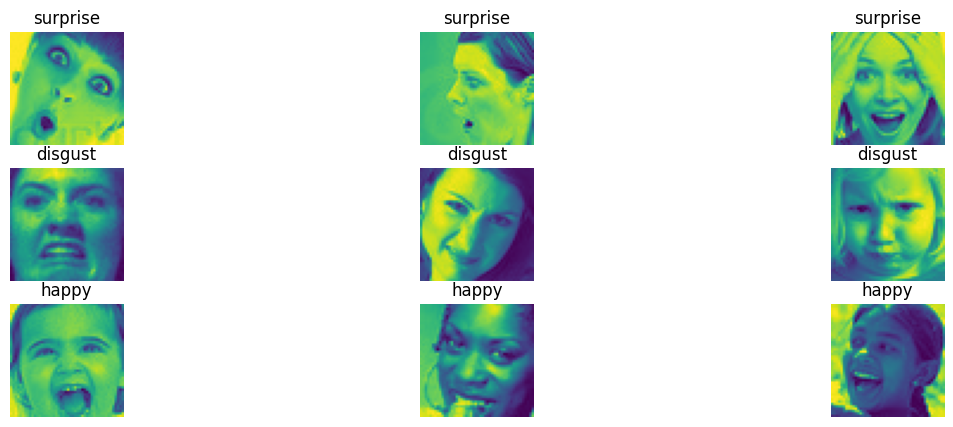

In [6]:
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

# Pick 3 random emotion classes
emotion_classes = os.listdir(train_dir)
sample_classes = random.sample(emotion_classes, min(3, len(emotion_classes)))

plt.figure(figsize=(15, 5))
for i, emotion in enumerate(sample_classes):
    folder = os.path.join(train_dir, emotion)
    images = os.listdir(folder)
    sample_images = random.sample(images, min(3, len(images)))

    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(folder, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(len(sample_classes), 3, i * 3 + j + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(emotion)
plt.show()


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.

✅ Classes found: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
📊 Training samples: 22968
📊 Validation samples: 5741
📊 Test samples: 7178


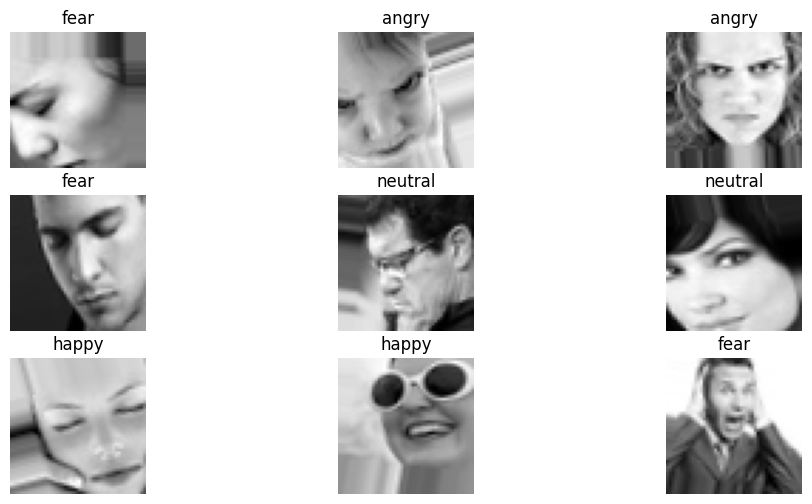

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- 2️⃣ Image parameters ---
IMG_SIZE = (48, 48)      # standard for facial emotion recognition
BATCH_SIZE = 64

# --- 3️⃣ Create ImageDataGenerator ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2   # ✅ Automatically reserve 20% for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# --- 4️⃣ Create Generators ---
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training',     # ✅ Use 80% for training
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation',   # ✅ Use 20% for validation
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)

# --- 5️⃣ Display info ---
print("\n✅ Classes found:", train_generator.class_indices)
print(f"📊 Training samples: {train_generator.samples}")
print(f"📊 Validation samples: {val_generator.samples}")
print(f"📊 Test samples: {test_generator.samples}")

# --- 6️⃣ Visualize few images ---
images, labels = next(train_generator)
plt.figure(figsize=(12, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].reshape(48,48),cmap='gray')
    plt.title(list(train_generator.class_indices.keys())[labels[i].argmax()])
    plt.axis("off")
plt.show()


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau


# --- 4️⃣ Build custom model on top ---
model = Sequential([
    #1st conv layer
   Conv2D(64,(3,3),activation='relu',input_shape=(48,48,1)),
   BatchNormalization(),
   MaxPooling2D(2,2),
   Dropout(0.25),
      #2nd conv layer
   Conv2D(128,(3,3),activation='relu'),
   BatchNormalization(),
   MaxPooling2D(2,2),
   Dropout(0.25),

     #3rd conv layer
   Conv2D(256,(3,3),activation='relu'),
   BatchNormalization(),
   MaxPooling2D(2,2),
   Dropout(0.25),

   Flatten(),
    #classification part
   Dense(512,activation='relu'),
   BatchNormalization(),
   Dropout(0.5),
   #output layer
   Dense(7,activation='softmax')
])

# --- 5️⃣ Compile model ---
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- 6️⃣ Model summary ---
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,474,759 (9.44 MB)

 Trainable params: 2,472,839 (9.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.1701 - loss: 2.9593 - val_accuracy: 0.2174 - val_loss: 2.2459 - learning_rate: 1.0000e-04
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.1929 - loss: 2.5213 - val_accuracy: 0.2463 - val_loss: 1.9305 - learning_rate: 1.0000e-04
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.2127 - loss: 2.3428 - val_accuracy: 0.2681 - val_loss: 1.8657 - learning_rate: 1.0000e-04
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.2151 - loss: 2.2340 - val_accuracy: 0.2820 - val_loss: 1.7858 - learning_rate: 1.0000e-04
Epoch 5/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.2234 - loss: 2.1801 - val_accuracy: 0.2869 - val_loss: 1.7755 - learning_rate: 1.0000e-04
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.2317 - loss: 2.1137 - val_accuracy: 0.2937 - val_loss: 1.7779 - learning_rate: 1.0000e-04
Epoch 7/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accurac

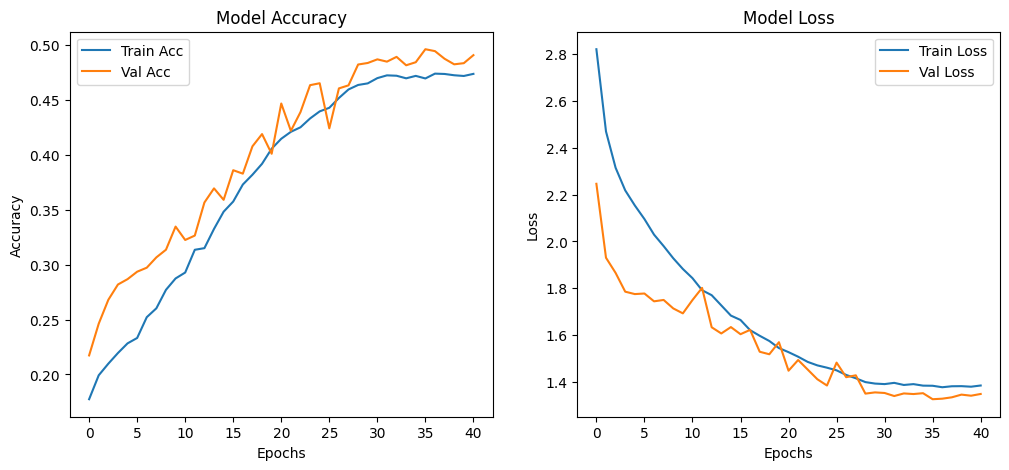

In [9]:


# --- 1️⃣ Callbacks ---
# Stop training if validation loss doesn’t improve for 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler=ReduceLROnPlateau(monitor='val_loss', min_lr=1e-6, patience=3, verbose=1)
# Save best model automatically

# --- 2️⃣ Train the Model ---
EPOCHS = 50

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,

    callbacks=[early_stop, lr_scheduler]
)

# --- 3️⃣ Plot Training Curves ---
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5175 - loss: 1.2859

✅ Test Accuracy: 52.24%


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

📊 Classification Report:

              precision    recall  f1-score   support

       angry       0.35      0.62      0.44       958
     disgust       0.54      0.12      0.19       111
        fear       0.33      0.17      0.22      1024
       happy       0.79      0.75      0.77      1774
     neutral       0.49      0.50      0.49      1233
         sad       0.48      0.29      0.36      1247
    surprise       0.54      0.80      0.64       831

    accuracy                           0.52      7178
   macro avg       0.50      0.46      0.45      7178
weighted avg       0.53      0.52      0.51      7178



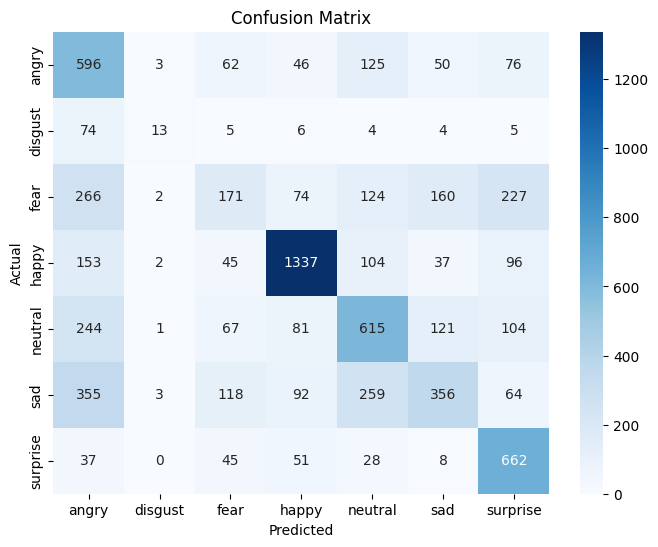

In [11]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get all batches from the test generator
all_test_images = []
all_test_labels = []
for i in range(len(test_generator)):
    images, labels = test_generator[i]
    all_test_images.append(images)
    all_test_labels.append(labels)

test_images = np.concatenate(all_test_images)
test_labels = np.concatenate(all_test_labels)


predictions = model.predict(test_images)
y_true=np.argmax(test_labels,axis=1)
y_pred=np.argmax(predictions,axis=1)
class_labels=list(test_generator.class_indices.keys())


# --- 3️⃣ Classification report ---
print("\n📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# --- 4️⃣ Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


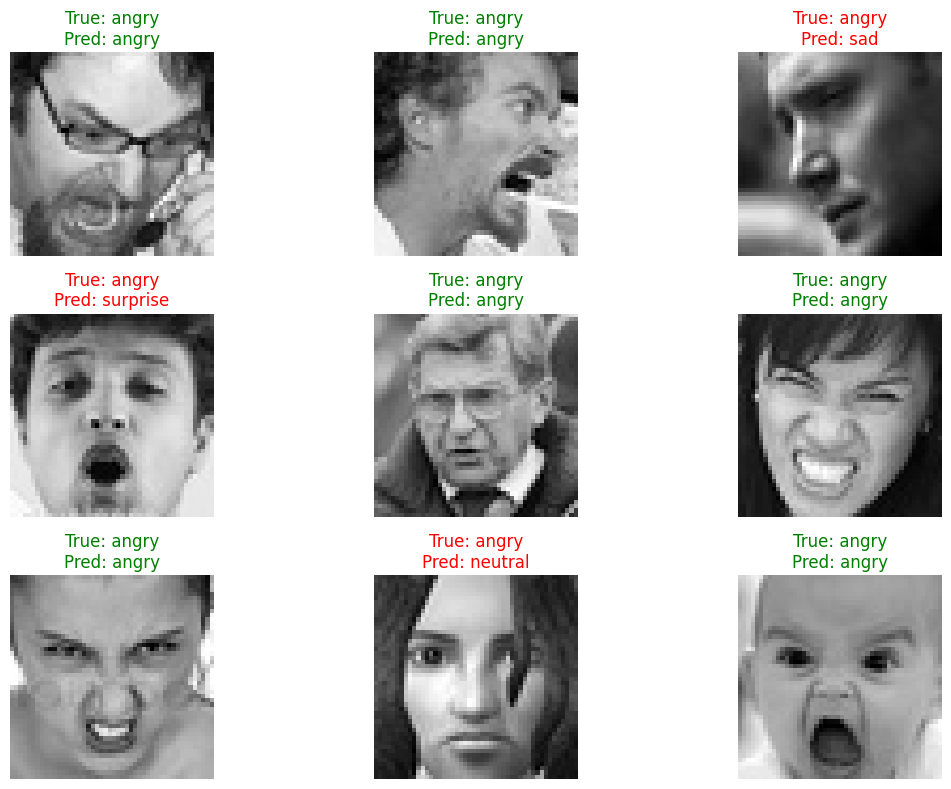

In [13]:
# --- 5️⃣ Visualize few predictions ---
plt.figure(figsize=(12, 8))
# Iterate through the first 3 batches of the test generator
for i in range(3):
    img, label = test_generator[i]
    predictions = model.predict(img)  # Predict for the current batch
    pred_idx = np.argmax(predictions, axis=1)

    for j in range(3):  # show 3 images from the current batch
        plt.subplot(3, 3, i*3 + j + 1)
        plt.imshow(img[j].reshape(IMG_SIZE), cmap='gray') # Reshape for grayscale display
        true_label = list(test_generator.class_indices.keys())[np.argmax(label[j])]
        pred_label = list(test_generator.class_indices.keys())[pred_idx[j]]
        color = 'green' if true_label == pred_label else 'red'
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
        plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

def detect_emotion(img_path):
  img=image.load_img(img_path,target_size=(48,48),color_mode='grayscale')
  img=image.img_to_array(img)/255.0
  img_array=np.expand_dims(img_array,axis=0)
  prediction=model.predict(img_array)
  pred_idx=np.argmax(prediction)
  prediction_class=class_names[pred_idx]
  confidence=round(prediction[0][pred_idx]*100,2)
  plt.imshow(img,cmap='gray')
  plt.title(f"Prediction: {prediction_class}\nConfidence: {confidence}%")
  plt.axis('off')
  plt.show()
  return prediction_class,confidence


In [16]:
# Upload the image file to your Colab session first.
# You can do this by clicking the "folder" icon on the left sidebar,
# then clicking the "upload" icon and selecting your image file.

# Once uploaded, get the path of the uploaded file and replace the placeholder below.
uploaded_image_path = "/content/your_uploaded_image.jpg"  # Replace with the actual path

# Make sure 'class_names' is defined. It should be a list of emotion class names
# in the same order as returned by test_generator.class_indices.keys()

try:
    pred_emotion, confidence = detect_emotion(uploaded_image_path)
    print(f"Predicted Emotion: {pred_emotion}")
    print(f"Confidence: {confidence}%")
except FileNotFoundError:
    print(f"Error: File not found at {uploaded_image_path}. Please upload the image and update the path.")
except NameError:
    print("Error: 'class_names' is not defined. Please define 'class_names' with the list of emotion labels.")

Error: File not found at /content/your_uploaded_image.jpg. Please upload the image and update the path.
